In [19]:
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import Point
from shapely import get_point
import momepy
import pyogrio

import warnings
warnings.filterwarnings("ignore")

In [20]:
def create_pictures_original(case, input_file, output_file, coordinates, buffer):
    
    #Read the input file
    input = gpd.read_file(input_file, layer='roads_input', engine='pyogrio')
    
    #Remove false nodes
    input = momepy.remove_false_nodes(input)
    
    #Extract vertices
    vertices = pd.concat([get_point(input.geometry.explode(ignore_index=True),0), get_point(input.geometry.explode(ignore_index=True),-1)], ignore_index=True).drop_duplicates()
   
    #Create a point from the coordinates
    coordinates = Point(coordinates)
    coordinates = gpd.GeoDataFrame(pd.DataFrame({'geometry': [coordinates]}), geometry='geometry', crs='EPSG:4326').to_crs(input.crs)

    #Create a square buffer around the coordinates
    buffer = coordinates.buffer(buffer, cap_style=3)

    #Clip the data
    clip_input = gpd.clip(input, buffer)
    clip_vertices = gpd.clip(vertices, buffer)

    #Plot the data
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    clip_input.plot(ax=ax, color='black', linewidth=0.5, linestyle='-')
    clip_vertices.plot(ax=ax, color='k', markersize=2)
    coordinates.plot(ax=ax, color='red', markersize=0)
    plt.title(case)
    
    #Save the plot
    plt.savefig(output_file)

In [21]:
def create_pictures_simplified(case, input_file, output_file, coordinates, buffer):
    
    #Read the input file
    input = gpd.read_file(input_file, layer='roads_output', engine='pyogrio')
    
    #Extract vertices
    vertices = pd.concat([get_point(input.geometry.explode(ignore_index=True),0), get_point(input.geometry.explode(ignore_index=True),-1)], ignore_index=True).drop_duplicates()
    
    #Create a point
    coordinates = Point(coordinates)
    coordinates = gpd.GeoDataFrame(pd.DataFrame({'geometry': [coordinates]}), geometry='geometry', crs='EPSG:4326').to_crs(input.crs)

    #&reate a buffer around the point
    buffer = coordinates.buffer(buffer, cap_style=3)

    #Clip the data
    clip_input = gpd.clip(input, buffer)
    clip_vertices = gpd.clip(vertices, buffer)

    #Plot the data
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    clip_input.plot(ax=ax, color='black', linewidth=0.5, linestyle='-')
    clip_vertices.plot(ax=ax, color='k', markersize=2)
    coordinates.plot(ax=ax, color='red', markersize=0)
    plt.title(case)
    
    #Save the plot
    plt.savefig(output_file)

In [22]:
#List of dictionaries for the input files
input_files_original = [
    {'case': 'Case 11 - Cloverleaf interchange', 'input_file':'1133_output.gpkg', 'output_file':'11_original.png', 'coordinates': (37.222222, 36.194167), 'buffer':500},
    {'case': 'Case 10 - Ovalabout', 'input_file':'1133_output.gpkg', 'output_file':'10_original.png', 'coordinates': (37.1680681, 36.1939477), 'buffer':200},
    {'case': 'Case 9 - Cul-de-sac', 'input_file':'1133_output.gpkg', 'output_file':'09_original.png', 'coordinates': (36.9760168, 36.1273910), 'buffer':200},
    {'case': 'Case 8 - Side roads', 'input_file':'1133_output.gpkg', 'output_file':'08_original.png', 'coordinates': (37.1398569, 36.2401153), 'buffer':200},
    {'case': 'Case 7 - Intersection', 'input_file':'1133_output.gpkg', 'output_file':'07_original.png', 'coordinates': (37.1427047, 36.2365752), 'buffer':100},
    {'case': 'Case 5 - Simple Intersection', 'input_file':'1133_output.gpkg', 'output_file':'05_original.png', 'coordinates': (37.0659947, 36.3105479), 'buffer':100},
    {'case': 'Case 17 - Roundabout with roads on different levels', 'input_file':'1133_output.gpkg', 'output_file':'17_original.png', 'coordinates': (37.1797839, 36.2086177), 'buffer':100},
    {'case': 'Case 18 - Partial cloverleaf interchange', 'input_file':'1133_output.gpkg', 'output_file':'18_original.png', 'coordinates': (36.9912088, 36.0967749), 'buffer':500},
    {'case': 'Case 3 - Diverging roads', 'input_file':'1133_output.gpkg', 'output_file':'03_orginal.png', 'coordinates': (37.0683693, 36.3143588), 'buffer':100},
    {'case': 'Case 14 - Parallel roads connected with a linking road', 'input_file':'4617_output.gpkg', 'output_file':'14_original.png', 'coordinates': (-73.1613889,7.0644444), 'buffer':100},
    {'case': 'Case 15 - Outliers', 'input_file':'4617_output.gpkg', 'output_file':'15_original.png', 'coordinates': (-73.1275000,7.1252778), 'buffer':100},
    {'case': 'Case 4 - T-Junction', 'input_file':'869_output.gpkg', 'output_file':'04_original.png', 'coordinates': (174.7512042, -36.8897222), 'buffer':100},
    {'case': 'Case 12 - Multi-level carriageway', 'input_file':'869_output.gpkg', 'output_file':'12_original.png', 'coordinates': (174.8400000, -36.9186111), 'buffer':300},
    {'case': 'Case 19 - Complicated freeway intersection', 'input_file':'869_output.gpkg', 'output_file':'19_original.png', 'coordinates': (174.7616667, -36.7991667), 'buffer':300},
    {'case': 'Case 1 - Parallel roads', 'input_file':'809_output.gpkg', 'output_file':'01_original.png', 'coordinates': (9.8198052, 4.0024864), 'buffer':200},
    {'case': 'Case 2 - Roundabout', 'input_file':'809_output.gpkg', 'output_file':'02_original.png', 'coordinates': (9.8213187, 4.0098569), 'buffer':100},
    {'case': 'Case 6 - A cross-shaped intersection', 'input_file':'809_output.gpkg', 'output_file':'06_original.png', 'coordinates': (9.7410638, 4.0968701), 'buffer':100},
    {'case': 'Case 16 - Parallel road leading to different levels', 'input_file':'809_output.gpkg', 'output_file':'16_original.png', 'coordinates': (9.6611711, 4.0880919), 'buffer':200},
    {'case': 'Case 13 - Special case roundabouts', 'input_file':'1656_output.gpkg', 'output_file':'13_original.png', 'coordinates': (5.6155107, 50.6764454), 'buffer':100}
]

In [23]:
#List of dictionaries for the simplified cases
input_files_simplified = [
    {'case': 'Case 11 - Cloverleaf interchange', 'input_file':'1133_output.gpkg', 'output_file':'11_simplified.png', 'coordinates': (37.222222, 36.194167), 'buffer':500},
    {'case': 'Case 10 - Ovalabout', 'input_file':'1133_output.gpkg', 'output_file':'10_simplified.png', 'coordinates': (37.1680681, 36.1939477), 'buffer':200},
    {'case': 'Case 9 - Cul-de-sac', 'input_file':'1133_output.gpkg', 'output_file':'09_simplified.png', 'coordinates': (36.9760168, 36.1273910), 'buffer':200},
    {'case': 'Case 8 - Side roads', 'input_file':'1133_output.gpkg', 'output_file':'08_simplified.png', 'coordinates': (37.1398569, 36.2401153), 'buffer':200},
    {'case': 'Case 7 - Intersection', 'input_file':'1133_output.gpkg', 'output_file':'07_simplified.png', 'coordinates': (37.1427047, 36.2365752), 'buffer':100},
    {'case': 'Case 5 - Simple Intersection', 'input_file':'1133_output.gpkg', 'output_file':'05_simplified.png', 'coordinates': (37.0659947, 36.3105479), 'buffer':100},
    {'case': 'Case 17 - Roundabout with roads on different levels', 'input_file':'1133_output.gpkg', 'output_file':'17_simplified.png', 'coordinates': (37.1797839, 36.2086177), 'buffer':100},
    {'case': 'Case 18 - Partial cloverleaf interchange', 'input_file':'1133_output.gpkg', 'output_file':'18_simplified.png', 'coordinates': (36.9912088, 36.0967749), 'buffer':500},
    {'case': 'Case 3 - Diverging roads', 'input_file':'1133_output.gpkg', 'output_file':'03_simplified.png', 'coordinates': (37.0683693, 36.3143588), 'buffer':100},
    {'case': 'Case 14 - Parallel roads connected with a linking road', 'input_file':'4617_output.gpkg', 'output_file':'14_simplified.png', 'coordinates': (-73.1613889,7.0644444), 'buffer':100},
    {'case': 'Case 15 - Outliers', 'input_file':'4617_output.gpkg', 'output_file':'15_simplified.png', 'coordinates': (-73.1275000,7.1252778), 'buffer':100},
    {'case': 'Case 4 - T-Junction', 'input_file':'869_output.gpkg', 'output_file':'04_simplified.png', 'coordinates': (174.7512042, -36.8897222), 'buffer':100},
    {'case': 'Case 12 - Multi-level carriageway', 'input_file':'869_output.gpkg', 'output_file':'12_simplified.png', 'coordinates': (174.8400000, -36.9186111), 'buffer':300},
    {'case': 'Case 19 - Complicated freeway intersection', 'input_file':'869_output.gpkg', 'output_file':'19_simplified.png', 'coordinates': (174.7616667, -36.7991667), 'buffer':300},
    {'case': 'Case 1 - Parallel roads', 'input_file':'809_output.gpkg', 'output_file':'01_simplified.png', 'coordinates': (9.8198052, 4.0024864), 'buffer':200},
    {'case': 'Case 2 - Roundabout', 'input_file':'809_output.gpkg', 'output_file':'02_simplified.png', 'coordinates': (9.8213187, 4.0098569), 'buffer':100},
    {'case': 'Case 6 - A cross-shaped intersection', 'input_file':'809_output.gpkg', 'output_file':'06_simplified.png', 'coordinates': (9.7410638, 4.0968701), 'buffer':100},
    {'case': 'Case 16 - Parallel road leading to different levels', 'input_file':'809_output.gpkg', 'output_file':'16_simplified.png', 'coordinates': (9.6611711, 4.0880919), 'buffer':200},
    {'case': 'Case 13 - Special case roundabouts', 'input_file':'1656_output.gpkg', 'output_file':'13_simplified.png', 'coordinates': (5.6155107, 50.6764454), 'buffer':100}
]

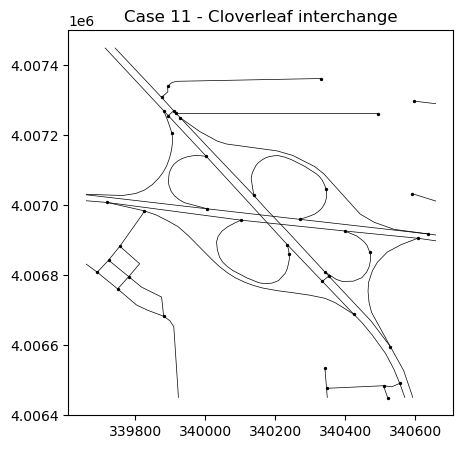

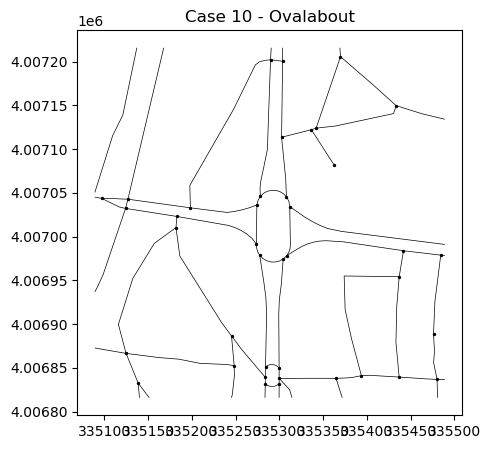

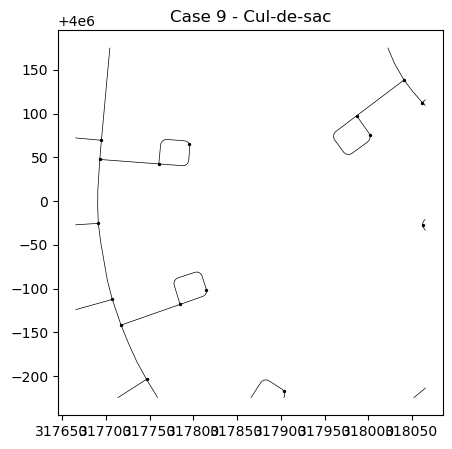

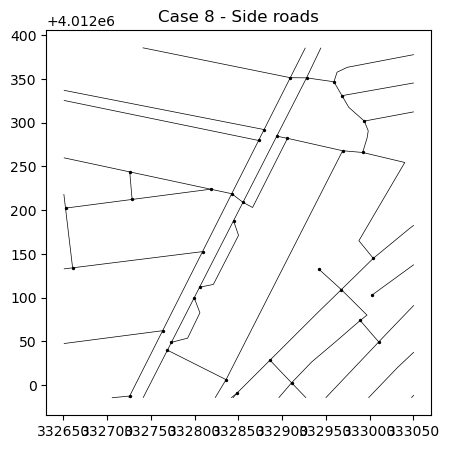

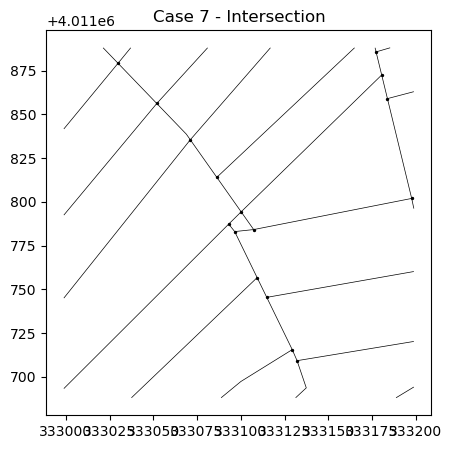

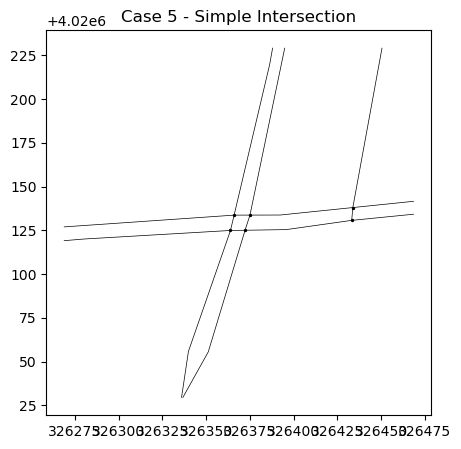

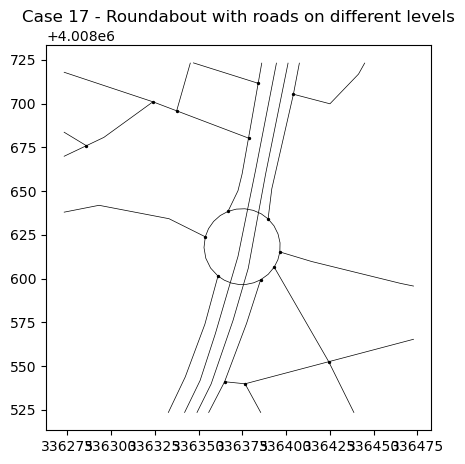

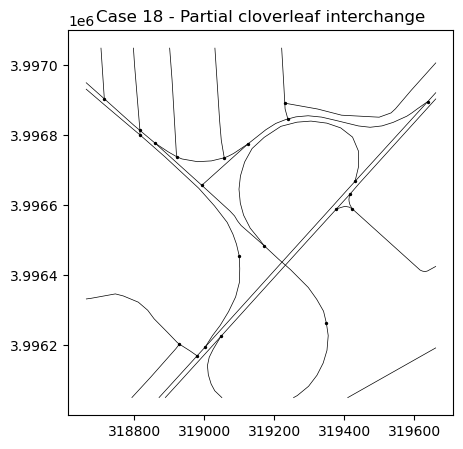

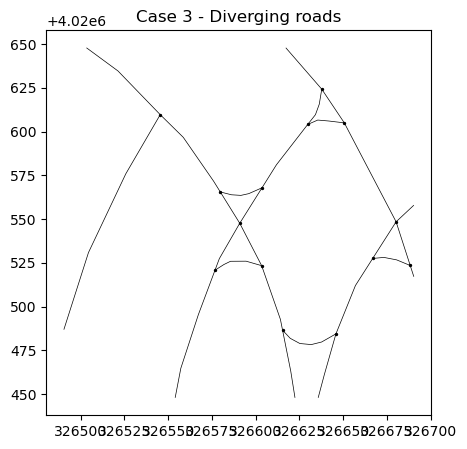

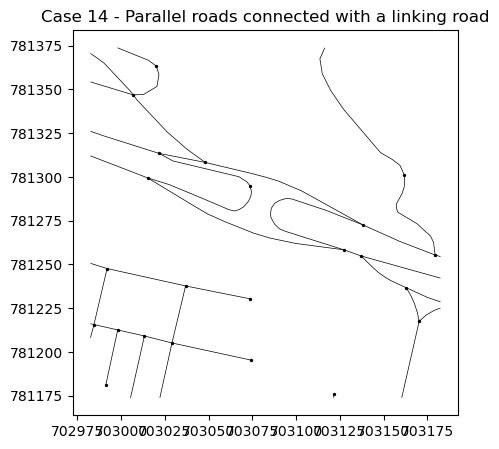

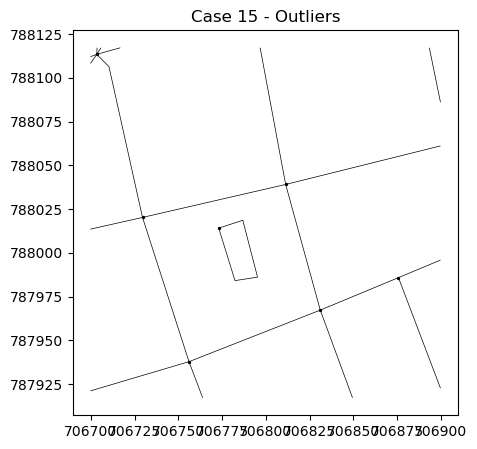

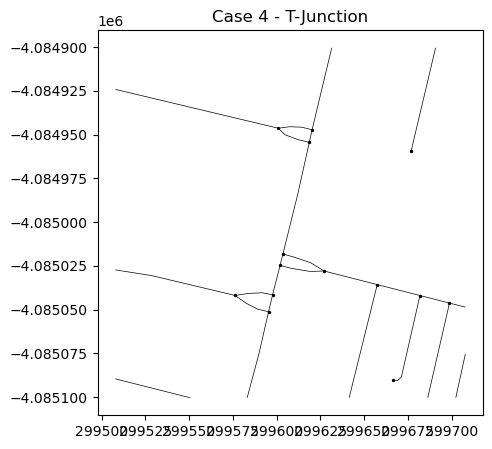

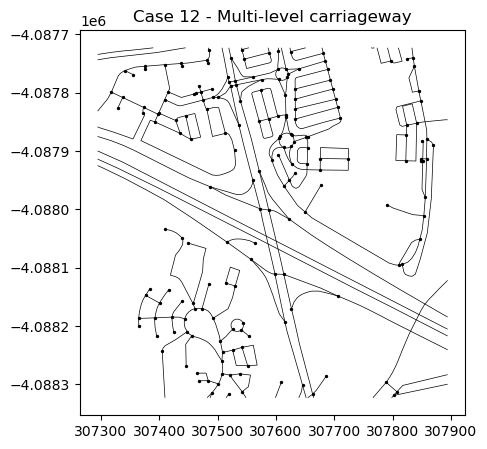

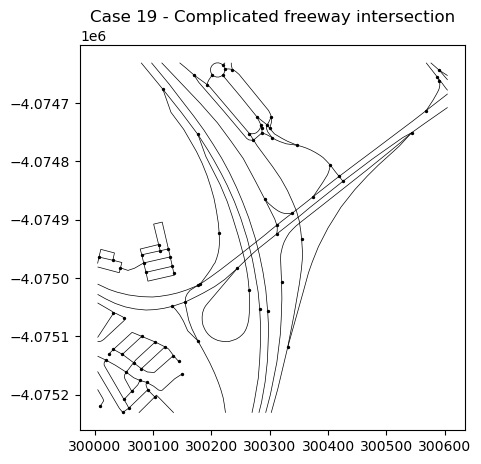

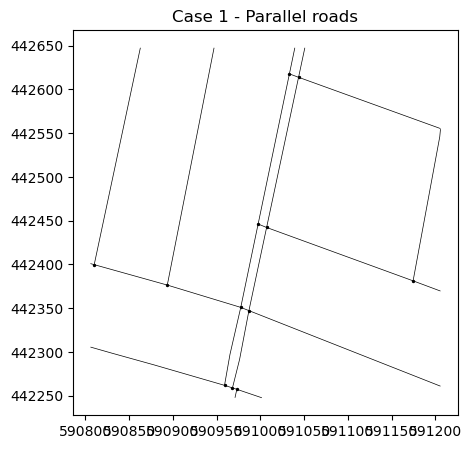

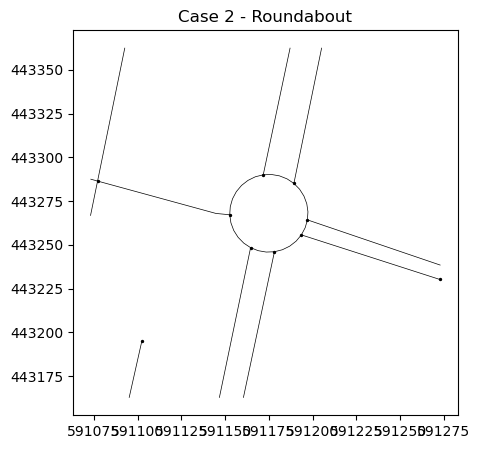

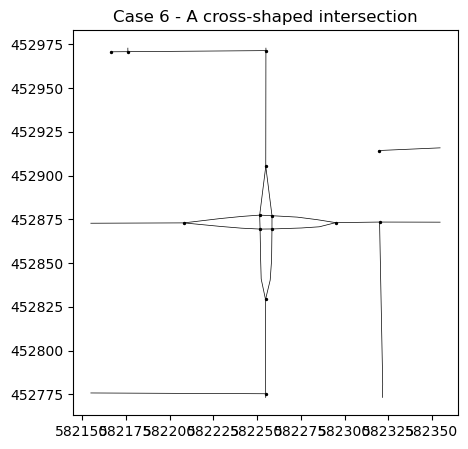

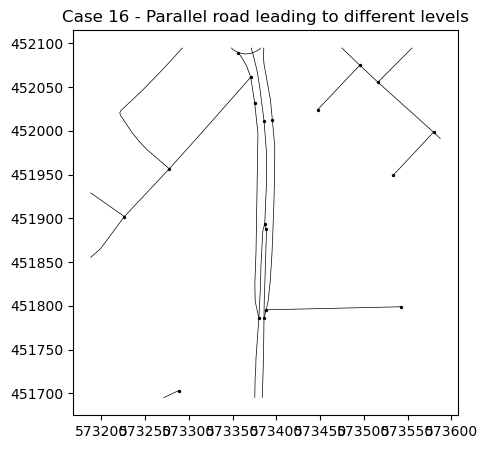

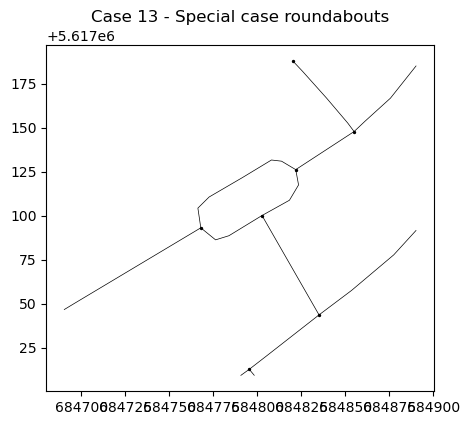

In [24]:
# Create pictures for the original cases
for case in input_files_original:
    create_pictures_original(case['case'], case['input_file'], case['output_file'], case['coordinates'], case['buffer'])

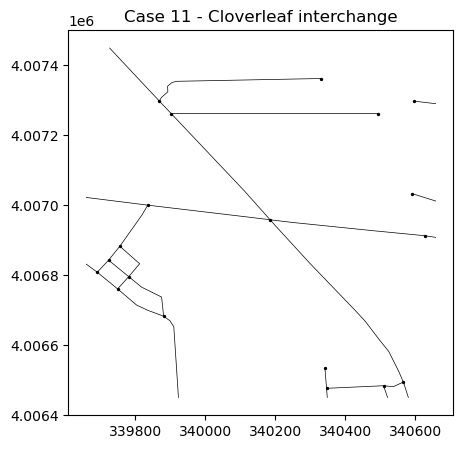

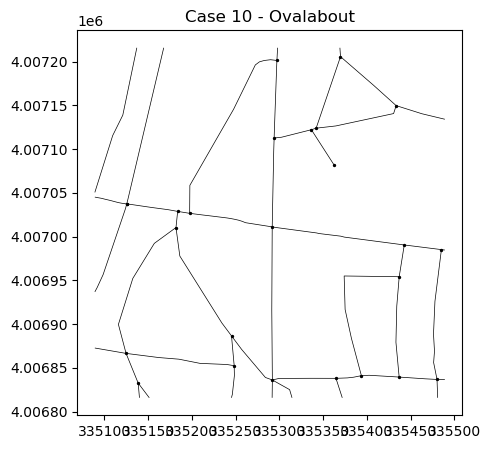

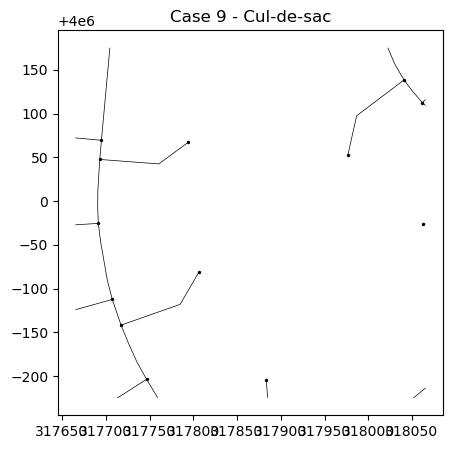

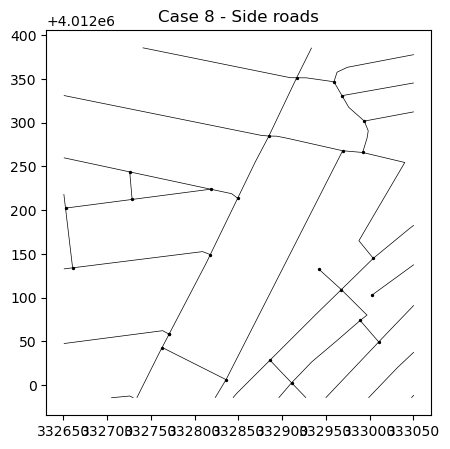

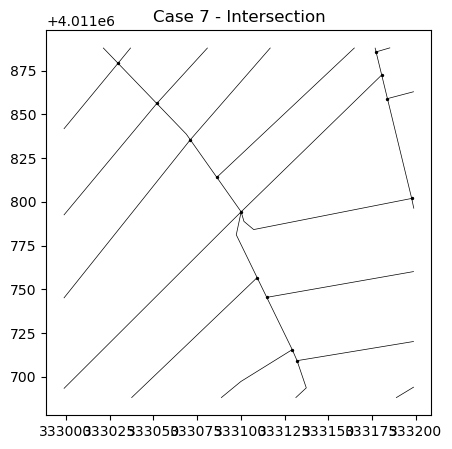

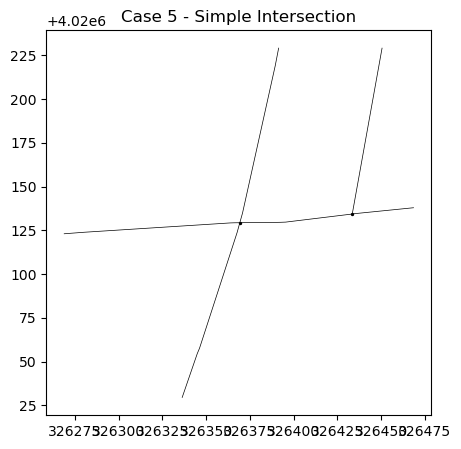

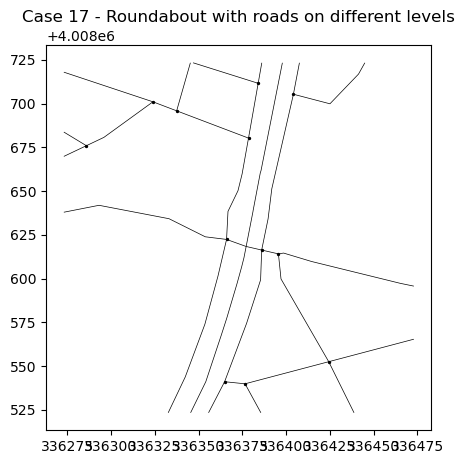

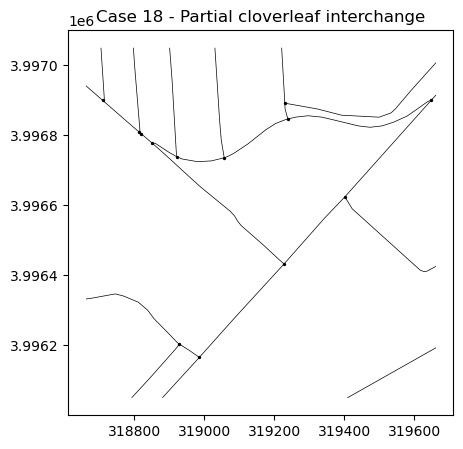

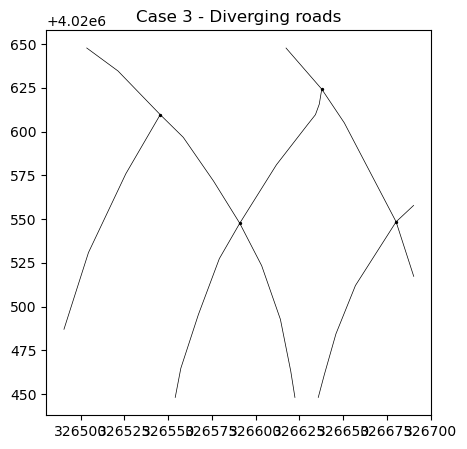

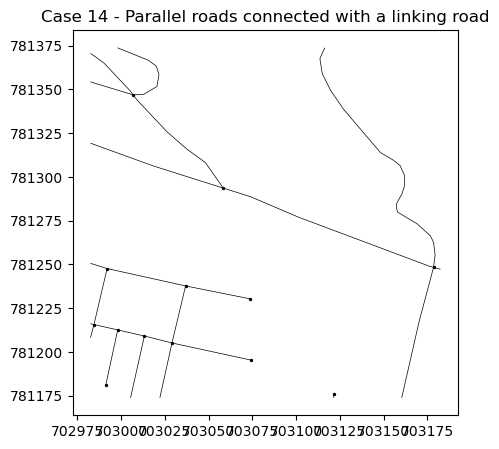

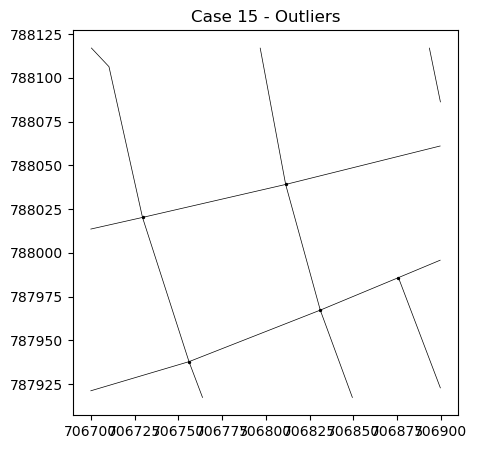

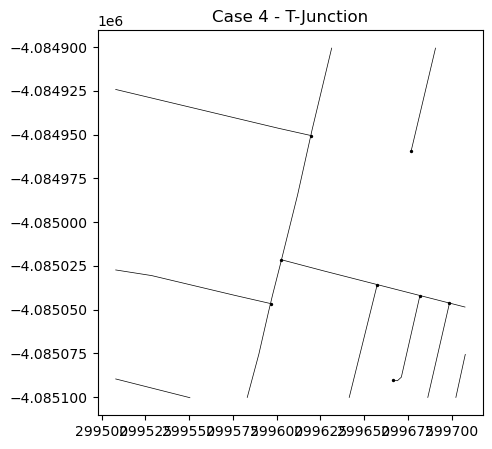

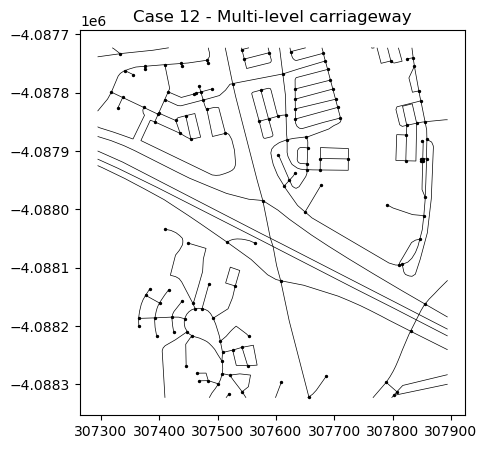

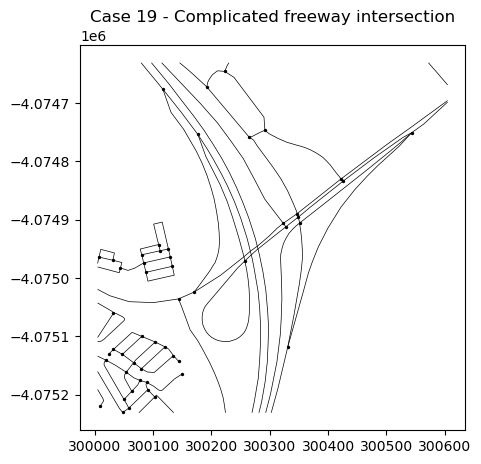

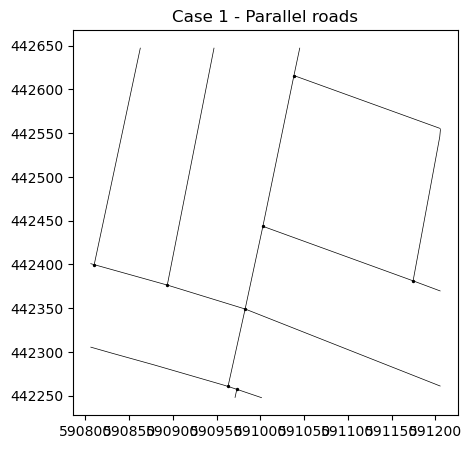

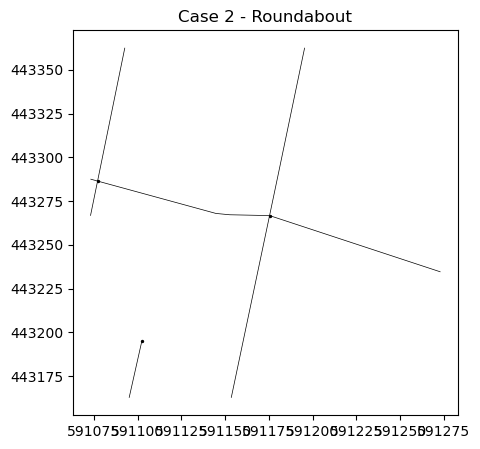

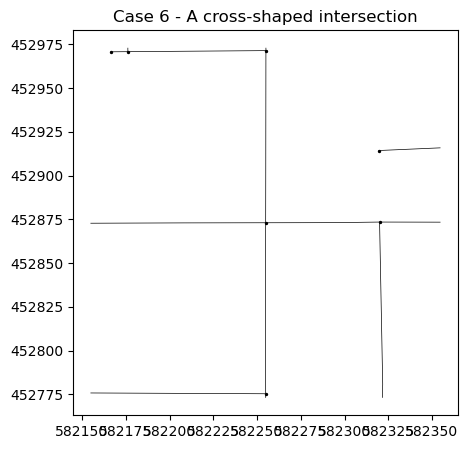

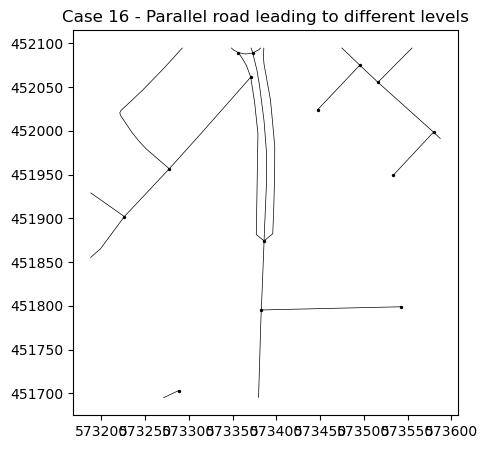

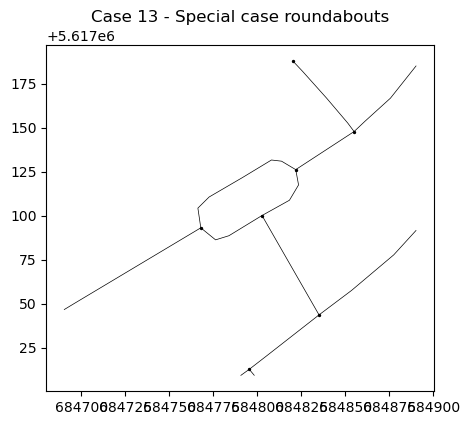

In [25]:
#Create pictures for the simplified cases
for case in input_files_simplified:
    create_pictures_simplified(case['case'], case['input_file'], case['output_file'], case['coordinates'], case['buffer'])